In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# data = pd.read_csv(".csv")
# data.head()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
benign=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.benign.csv')
g_c=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.combo.csv')
g_j=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.junk.csv')
g_s=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.scan.csv')
g_t=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.tcp.csv')
# g_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.gafgyt.udp.csv')
# m_a=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.ack.csv')
# m_sc=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.scan.csv')
# m_sy=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.syn.csv')
# m_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.udp.csv')
# m_u_p=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.udpplain.csv')

In [5]:
benign['type']='benign'
# m_u['type']='attack'
g_c['type']='combo'
g_j['type']='junk'
g_s['type']='scan'
g_t['type']='tcp'
# g_u['type']='attack'
# m_a['type']='attack'
# m_sc['type']='attack'
# m_sy['type']='attack'
# m_u_p['type']='attack'

In [6]:
data=pd.concat([benign,g_c,g_j,g_s, g_t],
               axis=0, sort=False, ignore_index=True)

In [10]:
data.groupby('type')['type'].count()

type
benign    13113
combo     53012
junk      30312
scan      27494
tcp       95021
Name: type, dtype: int64

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [13]:
from collections import Counter
print(sorted(Counter(y).items()))

[('benign', 13113), ('combo', 13113), ('junk', 13113), ('scan', 13113), ('tcp', 13113)]


In [14]:
#standardize numerical columns
# def standardize(df,col):
#     df[col]= (df[col]-df[col].mean())/df[col].std()
# data_st=data.copy()
# for i in (data_st.iloc[:,:-1].columns):
#     standardize (data_st,i)
# data_st.head()

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [17]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(65565, 115, 1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [19]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

model = Sequential()
model.add(Conv1D(64, 2, activation="relu", batch_input_shape=(None, 115, 1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(5, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 114, 64)           192       
                                                                 
 dense (Dense)               (None, 114, 16)           1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 57, 16)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 912)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 4565      
                                                                 
Total params: 5,797
Trainable params: 5,797
Non-trainable params: 0
______________________________________________________

In [20]:
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.2564 - accuracy: 0.8737 - val_loss: 0.1946 - val_accuracy: 0.8958
Epoch 2/10
1640/1640 [==============================] - 12s 7ms/step - loss: 0.1779 - accuracy: 0.9073 - val_loss: 0.1520 - val_accuracy: 0.9211
Epoch 3/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.1325 - accuracy: 0.9431 - val_loss: 0.1058 - val_accuracy: 0.9727
Epoch 4/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.0834 - accuracy: 0.9738 - val_loss: 0.0672 - val_accuracy: 0.9777
Epoch 5/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.0545 - accuracy: 0.9847 - val_loss: 0.0417 - val_accuracy: 0.9888
Epoch 6/10
1640/1640 [==============================] - 14s 8ms/step - loss: 0.0412 - accuracy: 0.9886 - val_loss: 0.0306 - val_accuracy: 0.9924
Epoch 7/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0263 - val_ac

In [21]:
y_pred=model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.9916113780218104
MCC        : 0.9895923591318962


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2614
           1       1.00      0.96      0.98      2587
           2       0.96      1.00      0.98      2669
           3       1.00      1.00      1.00      2579
           4       1.00      1.00      1.00      2664

    accuracy                           0.99     13113
   macro avg       0.99      0.99      0.99     13113
weighted avg       0.99      0.99      0.99     13113



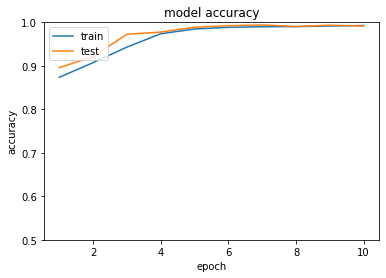

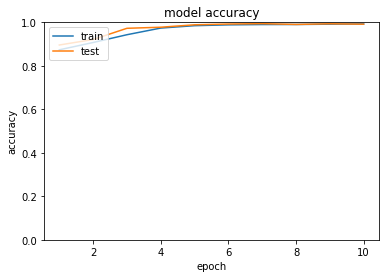

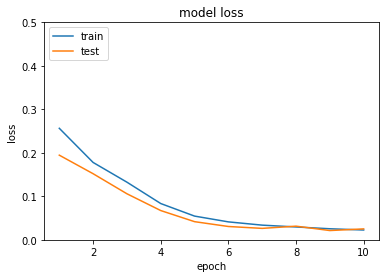

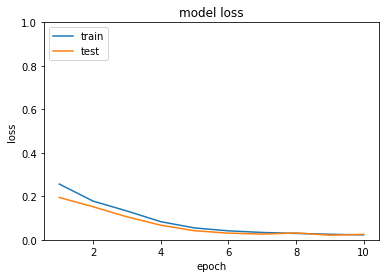

In [24]:
#Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.5, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()




#Loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 0.5])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

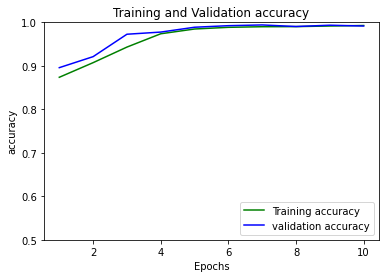

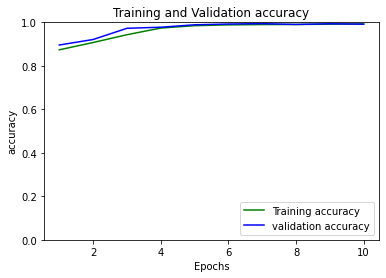

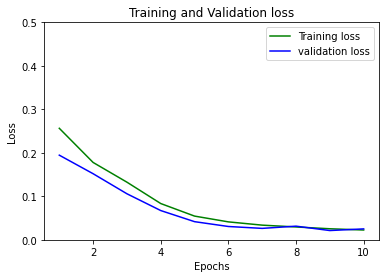

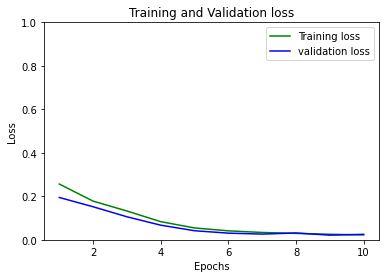

In [25]:
# Accuracy
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#loss
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()



plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

[[2612    0    0    1    1]
 [   0 2481  106    0    0]
 [   1    0 2668    0    0]
 [   0    1    0 2578    0]
 [   0    0    0    0 2664]]


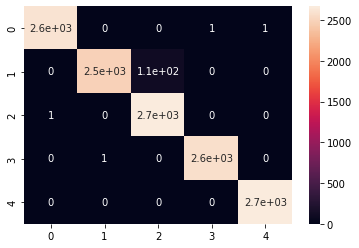

In [26]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)